In [ ]:
import pandas as pd
from datasets import Dataset, DatasetDict
from sklearn.model_selection import train_test_split
from src.utils.utils import sentiment_postprocessor, sentiment_preprocessor
from torch.utils.data import DataLoader
from transformers import DataCollatorWithPadding

RANDOM_STATE = 42


def sentiment_preprocessor(label):
    if label == "positive":
        return "позитив"
    elif label == "neautral" or label == "neutral":
        return "нейтральность"
    elif label == "negative":
        return "негатив"

In [ ]:
rusent_random_path = "data/ru-sentiment/rusentiment_random_posts.csv"
rusent_active_path = "data/ru-sentiment/rusentiment_preselected_posts.csv"
rusent_test_path = "data/ru-sentiment/rusentiment_test.csv"
labels = ["positive", "negative", "neutral"]

rusent_random = pd.read_csv(rusent_random_path)
rusent_active = pd.read_csv(rusent_active_path)
rusent_test = pd.read_csv(rusent_test_path)

# remove duplicate indexes, ignore index is vital
rusent_train_val = pd.concat([rusent_active, rusent_random], ignore_index=True)

rusent_train_val = rusent_train_val[rusent_train_val["label"].isin(labels)]
rusent_test = rusent_test[rusent_test["label"].isin(labels)]

rusent_train_val["text"] = rusent_train_val["text"].apply(lambda x: x.replace("\n", " "))
rusent_test["text"] = rusent_test["text"].apply(lambda x: x.replace("\n", " ").replace("\t", ""))

In [ ]:
rusent_random["label"].value_counts()

neutral     8323
positive    4635
skip        3190
speech      2826
negative    2294
Name: label, dtype: int64

In [ ]:
len(rusent_random)

21268

In [ ]:
len(rusent_active)

6950

In [ ]:
21268 + 6950

28218

In [ ]:
len(rusent_test)

2214

In [ ]:
pd.options.display.max_colwidth = 80

In [ ]:
rusent_train_val.sample(3)

,label,text
11667,neutral,"Теперь у меня есть фирменная футболочка студии ""Mari и Я"" ."
13884,neutral,"""Ты выложился сегодня до конца?"""
3945,negative,"Вот что за херня,почему мне не пишут никогда что я лучший и т.п. ))) А у теб..."


In [ ]:
rusent_train_val["Length words"] = rusent_train_val["text"].apply(lambda x: len(x.split()))
rusent_train_val["Length"] = rusent_train_val["text"].apply(len)

In [ ]:
rusent_train_val["Length words"].mean()

12.38430497531333

In [ ]:
rusent_train_val["Length"].mean()

79.41620774781617

In [ ]:
rusent_train_val["label"] = rusent_train_val["label"].apply(sentiment_preprocessor)

In [ ]:
rusent_train_val.groupby("label").sample(2)[["text", "label"]]

,text,label
15447,Сегодня в с.Петровское Беляевского района произошло ДТП со смертельным исход...,негатив
8127,И ТЫ ДАЖЕ СЕРДЕЧКО НЕ ПОСТАВИЛ(((((,негатив
2019,"Зачем мне другие? Я не хочу быть вагоном, в который входят и выходят. Мне ну...",нейтральность
10418,Немного размялся. #Федотово,нейтральность
16767,Симпатюлька.,позитив
14312,песня норм,позитив


In [ ]:
rusent_train_val["label"].value_counts()

нейтральность    11300
позитив           6110
негатив           3654
Name: label, dtype: int64

<AxesSubplot: xlabel='Количество элементов', ylabel='Класс'>

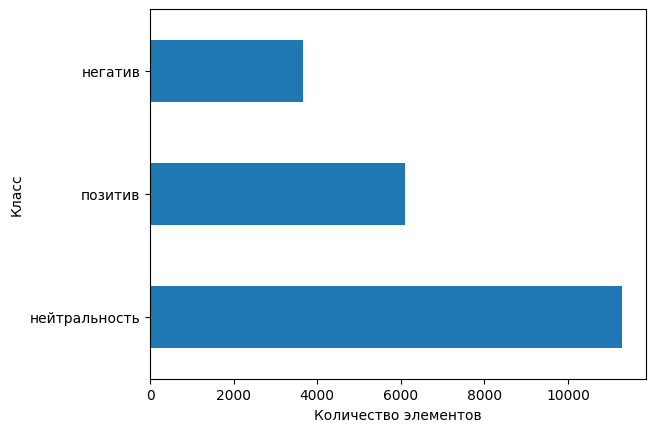

In [ ]:
rusent_train_val["label"].value_counts().plot.barh(xlabel="Количество элементов", ylabel="Класс")

In [ ]:
size = rusent_train_val.shape[0] + rusent_test.shape[0]
val_size = int(size * 0.09)

rusent_train, rusent_val = train_test_split(
    rusent_train_val, test_size=val_size, shuffle=True, random_state=RANDOM_STATE
)

print(
    f"Loaded RuSentiment: train {rusent_train.shape[0]},",
    f"val {rusent_val.shape[0]},",
    f"test {rusent_test.shape[0]}",
)

Loaded RuSentiment: train 18969, val 2095, test 2214
